KNeighborsClassifier - Accuracy: 0.619
SVC - Accuracy: 0.652
DecisionTreeClassifier - Accuracy: 0.644
RandomForestClassifier - Accuracy: 0.638
MLPClassifier - Accuracy: 0.529
AdaBoostClassifier - Accuracy: 0.397
GaussianNB - Accuracy: 0.469
QuadraticDiscriminantAnalysis - Accuracy: 0.479
SGDClassifier - Accuracy: 0.309
GradientBoostingClassifier - Accuracy: 0.629


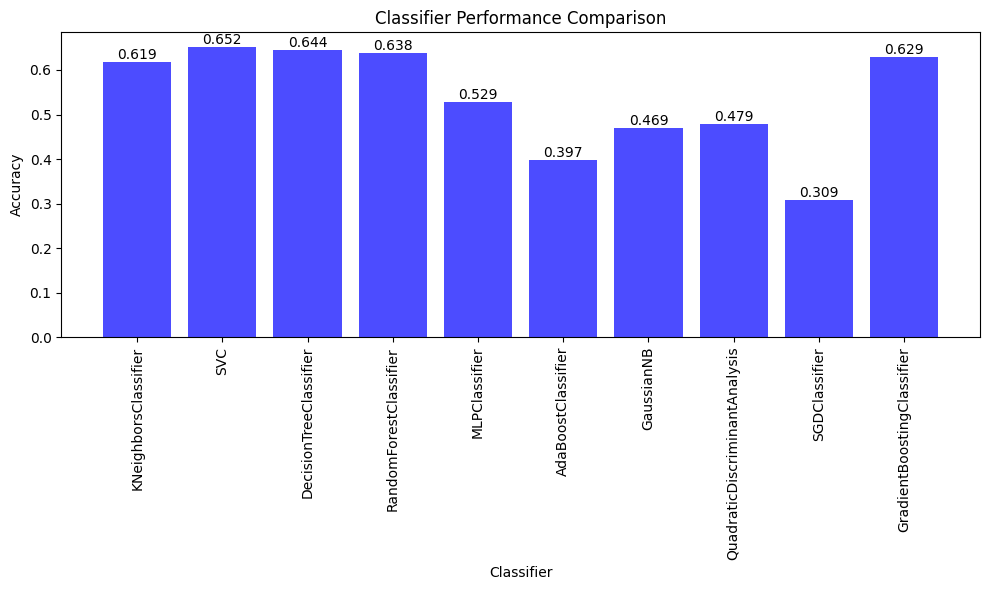

In [114]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


def preprocess_data(data):
    label_encoder = LabelEncoder()
    data['Year'] = label_encoder.fit_transform(data['Year'])
    data['Major'] = label_encoder.fit_transform(data['Major'])
    data['University'] = label_encoder.fit_transform(data['University'])
    return data

def train_and_evaluate_classifier(X, y, classifier):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

data = pd.read_csv('data.csv')

data = preprocess_data(data)

classifiers = [
    KNeighborsClassifier(7),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=50, random_state=42),
    RandomForestClassifier(
        max_depth=50, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, random_state=42),
    GradientBoostingClassifier(random_state=42)
]

accuracies = []
classifier_names = [classifier.__class__.__name__ for classifier in classifiers]

for classifier in classifiers:
    accuracy = train_and_evaluate_classifier(data[['Year', 'Major', 'University', 'Time']], data['Order'], classifier)
    print(f'{classifier.__class__.__name__} - Accuracy: {accuracy}')
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color='b', alpha=0.7)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.xticks(rotation=90)
plt.tight_layout()

for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc}', ha='center', va='bottom')

plt.show()